In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob('../FLIPFLOP/MIMIC/*.csv')
files.sort()
files
#Number of Trials
trials = 2
#File name beginining
nb = 28
#File name ending
ne = -10

In [3]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [4]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat((dfs[x],dfs[x+1]))
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[[5,10,50,100,150,200]])

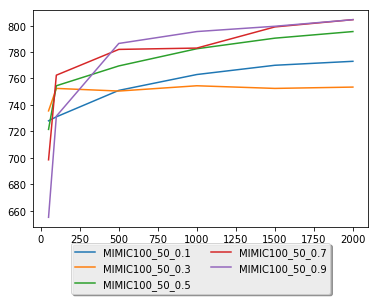

In [5]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

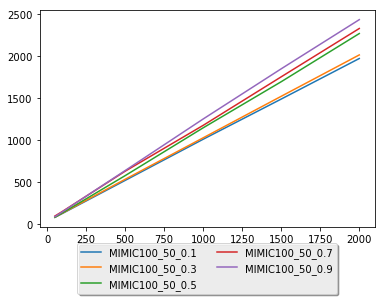

In [6]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [7]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 MIMIC100_50_0.1
1 MIMIC100_50_0.3
2 MIMIC100_50_0.5
3 MIMIC100_50_0.7
4 MIMIC100_50_0.9


In [8]:
#Change this
df = df_concats[4]
df

,iterations,fitness,time,fevals
5,50,655.0,81.552527,6500
10,100,731.5,142.820305,12000
50,500,786.5,632.893713,56000
100,1000,795.5,1248.812503,111000
150,1500,799.5,1847.923499,166000
200,2000,804.5,2434.547412,221000


In [9]:
with open('../FLIPFLOP/ff_results.csv', 'a') as f:
    f.write('#MIMIC\n')
    
df.to_csv('../FLIPFLOP/ff_results.csv', sep=',', mode='a', header=True)